In [1]:
import sys
sys.path.insert(0, '../../wildlife-tools')
sys.path.insert(0, '..')

import matplotlib.pyplot as plt
import pandas as pd
import torchvision.transforms as T
import timm

from wildlife_datasets import datasets,  splits
from wildlife_tools.data import WildlifeDataset
from wildlife_tools.features import DeepFeatures
from wildlife_tools.similarity import CosineSimilarity
from wildlife_tools.inference import KnnClassifier

import os
sys.path.append('..')
import pandas as pd
from wildlife_datasets import datasets
from wildlife_datasets.analysis import display_statistics, plot_bbox_segmentation, plot_grid
from wildlife_datasets.splits import visualize_split
from wildlife_datasets.splits import TimeCutoffSplit, TimeProportionSplit


In [2]:
# qwe = 0
# for d_name in datasets.names_all:
#     try:
#         # print(d_name.__name__, int(d_name.metadata['reported_n_individuals']))
#         # d_name.metadata
#         qwe += d_name.metadata['reported_n_individuals']
#         # print(qwe)
#     except:
#         # print("yes")

#         pass
# qwe

In [3]:
# dataset_attributes = dir(dataset)
# print(dataset_attributes)

In [4]:
# num_classes = dataset.num_classes
# num_classes

In [5]:
#Loading the dataset

names = [
    datasets.LionData,
    datasets.SealIDSegmented,
    datasets.SeaStarReID2023,
    datasets.StripeSpotter,
    datasets.CTai,
    datasets.CZoo
]

In [6]:
l = [
 'datasets.LionData',
 'datasets.SealIDSegmented',
 'datasets.SeaStarReID2023',
 'datasets.StripeSpotter',
 'datasets.CTai',
 'datasets.CZoo']

In [7]:
roots = ['data/' + str(dataset).split('.')[1] for dataset in l]
roots

['data/LionData',
 'data/SealIDSegmented',
 'data/SeaStarReID2023',
 'data/StripeSpotter',
 'data/CTai',
 'data/CZoo']

data/CZoo


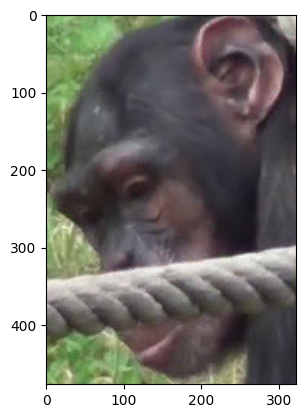

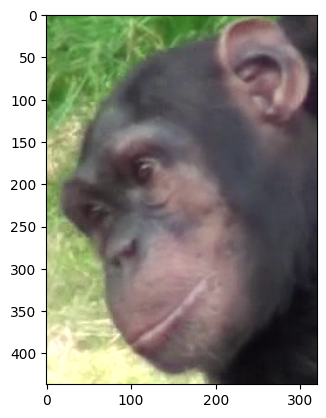

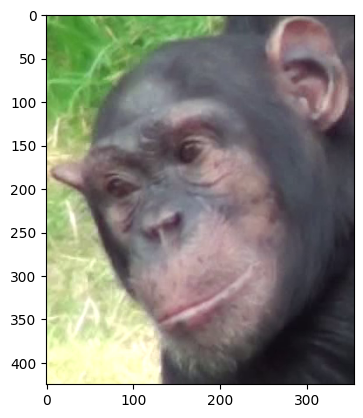

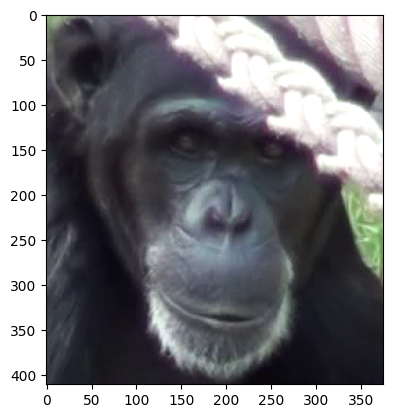

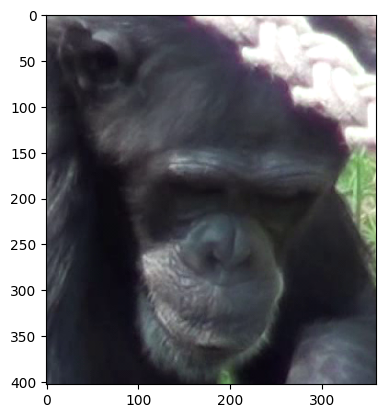

In [8]:
from wildlife_datasets.analysis import display_statistics, plot_bbox_segmentation, plot_grid
from wildlife_datasets.splits import visualize_split

root = roots[5]
print(root)
m = names[5](root)
print(m)
df = m.df
plot_bbox_segmentation(df, root, 5)

In [9]:
df

,image_id,identity,path,keypoints,age,age_group,gender
0,0,Alex,chimpanzee_faces-master\datasets_cropped_chimp...,"[56.0, 260.0, 118.0, 225.0, 125.0, 434.0, 270....",9,Juvenile,Male
1,1,Alex,chimpanzee_faces-master\datasets_cropped_chimp...,"[53.0, 233.0, 115.0, 184.0, 109.0, 378.0, 280....",9,Juvenile,Male
2,2,Alex,chimpanzee_faces-master\datasets_cropped_chimp...,"[82.0, 198.0, 166.0, 156.0, 154.0, 341.0, 318....",9,Juvenile,Male
3,3,Jahaga,chimpanzee_faces-master\datasets_cropped_chimp...,"[159.0, 142.0, 253.0, 149.0, 199.0, 337.0, nan...",17,Adult,Female
4,4,Jahaga,chimpanzee_faces-master\datasets_cropped_chimp...,"[166.0, 190.0, 259.0, 199.0, 186.0, 364.0, nan...",17,Adult,Female
...,...,...,...,...,...,...,...
2104,2104,Kara,chimpanzee_faces-master\datasets_cropped_chimp...,"[62.0, 61.0, 95.0, 60.0, 78.0, 108.0, nan, nan...",5,Infant,Female
2105,2105,Kofi,chimpanzee_faces-master\datasets_cropped_chimp...,"[nan, nan, 292.0, 101.0, 113.0, 31.0, 255.0, 3...",5,Infant,Male
2106,2106,Natascha,chimpanzee_faces-master\datasets_cropped_chimp...,"[562.0, 576.0, nan, nan, 342.0, 913.0, nan, na...",30,Adult,Female
2107,2107,Kofi,chimpanzee_faces-master\datasets_cropped_chimp...,"[nan, nan, 293.0, 92.0, 131.0, 24.0, 271.0, 29...",5,Infant,Male


Number of identitites            24
Number of all animals            2109
Number of animals with one image 0
Number of unidentified animals   0


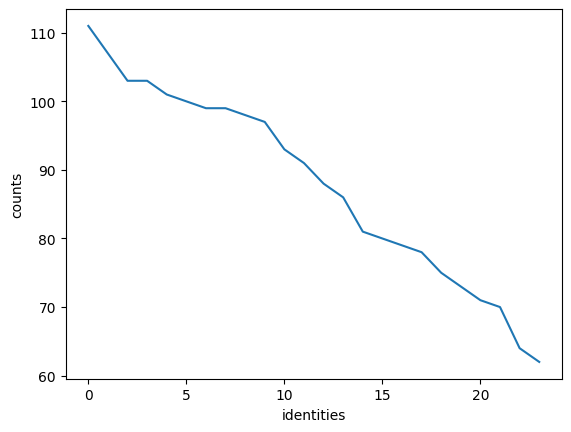

In [10]:
display_statistics(df)

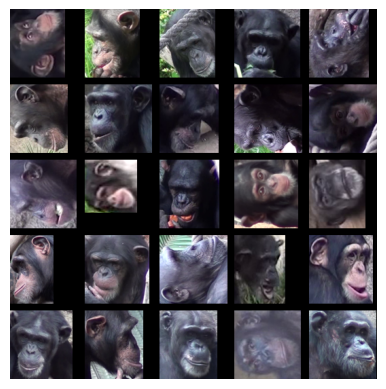

In [11]:
m.plot_grid(n_cols=5);

In [12]:
print(df.columns)

Index(['image_id', 'identity', 'path', 'keypoints', 'age', 'age_group',
       'gender'],
      dtype='object')


In [13]:
unique_categories = df['identity'].unique()
print(unique_categories)

['Alex' 'Jahaga' 'Alexandra' 'Gertrudia' 'Annett' 'Fifi' 'Bangolo'
 'Dorien' 'Corrie' 'Sandra' 'Ulla' 'Lobo' 'Riet' 'Pia' 'Kofi' 'Lome'
 'Robert' 'Fraukje' 'Kara' 'Frodo' 'Patrick' 'Tai' 'Swela' 'Natascha']


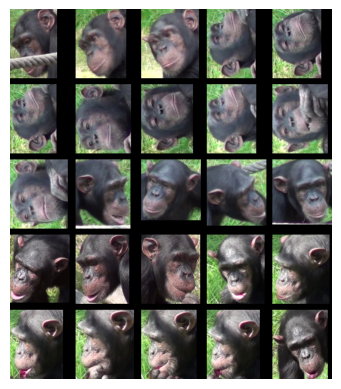

In [16]:
m.plot_grid(n_cols=5, idx=df['identity']=='Alex');

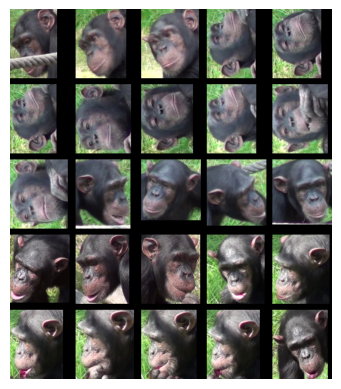

In [17]:
m.plot_grid(n_cols=5, idx=df['age']==9);

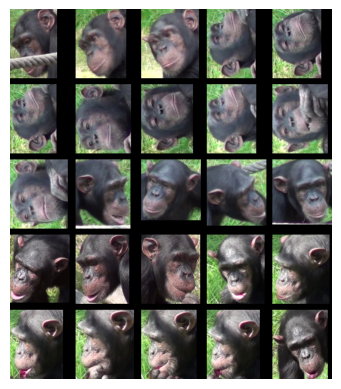

In [18]:
m.plot_grid(n_cols=5, idx=(df['age']==9)*(df['identity']=='Alex'));

In [19]:
print(m)

In [20]:
df

,image_id,identity,path,keypoints,age,age_group,gender
0,0,Alex,chimpanzee_faces-master\datasets_cropped_chimp...,"[56.0, 260.0, 118.0, 225.0, 125.0, 434.0, 270....",9,Juvenile,Male
1,1,Alex,chimpanzee_faces-master\datasets_cropped_chimp...,"[53.0, 233.0, 115.0, 184.0, 109.0, 378.0, 280....",9,Juvenile,Male
2,2,Alex,chimpanzee_faces-master\datasets_cropped_chimp...,"[82.0, 198.0, 166.0, 156.0, 154.0, 341.0, 318....",9,Juvenile,Male
3,3,Jahaga,chimpanzee_faces-master\datasets_cropped_chimp...,"[159.0, 142.0, 253.0, 149.0, 199.0, 337.0, nan...",17,Adult,Female
4,4,Jahaga,chimpanzee_faces-master\datasets_cropped_chimp...,"[166.0, 190.0, 259.0, 199.0, 186.0, 364.0, nan...",17,Adult,Female
...,...,...,...,...,...,...,...
2104,2104,Kara,chimpanzee_faces-master\datasets_cropped_chimp...,"[62.0, 61.0, 95.0, 60.0, 78.0, 108.0, nan, nan...",5,Infant,Female
2105,2105,Kofi,chimpanzee_faces-master\datasets_cropped_chimp...,"[nan, nan, 292.0, 101.0, 113.0, 31.0, 255.0, 3...",5,Infant,Male
2106,2106,Natascha,chimpanzee_faces-master\datasets_cropped_chimp...,"[562.0, 576.0, nan, nan, 342.0, 913.0, nan, na...",30,Adult,Female
2107,2107,Kofi,chimpanzee_faces-master\datasets_cropped_chimp...,"[nan, nan, 293.0, 92.0, 131.0, 24.0, 271.0, 29...",5,Infant,Male


In [21]:
df['path'][0]

'chimpanzee_faces-master\\datasets_cropped_chimpanzee_faces\\data_CZoo\\face_images/img-id1-object-1.png'

In [22]:
dataset_path_prefix = 'D:\\Classroom\\Project\\p1\\wildlife-datasets\\data\\CZoo\\'
df['path'] = df['path'].apply(lambda x: os.path.join(dataset_path_prefix, x))

df['path'][0]

'D:\\Classroom\\Project\\p1\\wildlife-datasets\\data\\CZoo\\chimpanzee_faces-master\\datasets_cropped_chimpanzee_faces\\data_CZoo\\face_images/img-id1-object-1.png'

Number of images: 2109
Number of unique labels: 24


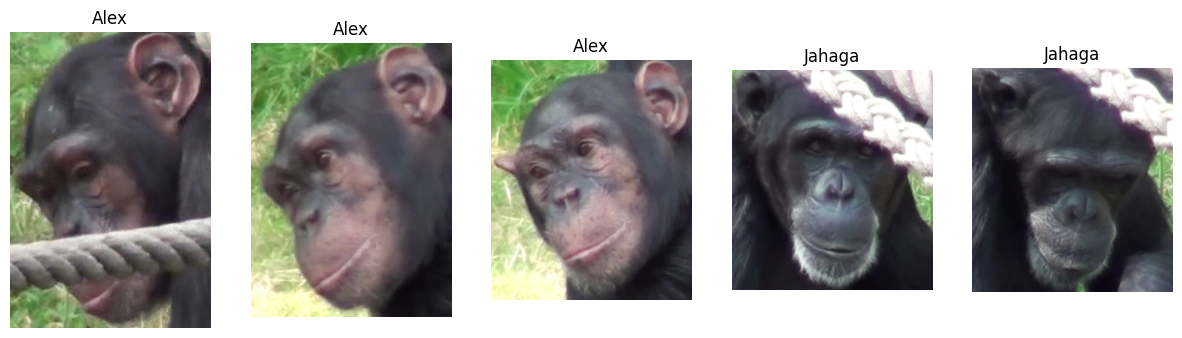

In [23]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Load images and labels
def load_images_from_dataframe(dataframe):
    images = []
    labels = []
    for index, row in dataframe.iterrows():
        file_path = row['path']
        image = cv2.imread(file_path)
        if image is not None:
            images.append(image)
            labels.append(row['identity'])
    return images, labels

images, labels = load_images_from_dataframe(df)

# Print the count of images and unique labels
print(f"Number of images: {len(images)}")
print(f"Number of unique labels: {len(set(labels))}")

# Plot a sample of images with their corresponding labels
num_samples = min(5, len(images))
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for i in range(num_samples):
    axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i].set_title(labels[i])
    axes[i].axis('off')
plt.show()


In [24]:
query_images = images[:100]
database_images = images[100:]
query_labels = labels[:100]
database_labels = labels[100:]

In [25]:
def extract_sift_features(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

In [26]:
# Extract features from database images
database_features = []
for image in database_images:
    keypoints, descriptors = extract_sift_features(image)
    database_features.append((keypoints, descriptors))

# Initialize variables for accuracy calculation
total_queries = len(query_images)
correct_predictions = 0
c = 0
# Extract features from query images
for query_image, query_label in zip(query_images, query_labels):
    query_keypoints, query_descriptors = extract_sift_features(query_image)
    
    # Initialize dictionary to store similarity scores
    similarity_scores = {}
    
    # Compare query features with database features
    for i, (db_keypoints, db_descriptors) in enumerate(database_features):
        # Match features (e.g., using FLANN or brute-force matcher)
        # Compute similarity scores
        # Here, let's use brute-force matcher as an example
        # Convert descriptors to the same type
        if db_descriptors is None:
            c+=1
            continue
        query_descriptors = query_descriptors.astype(np.float32)
        db_descriptors = db_descriptors.astype(np.float32)

        # Match features (e.g., using FLANN or brute-force matcher)
        # Compute similarity scores
        # Here, let's use brute-force matcher as an example
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(query_descriptors, db_descriptors, k=2)

        # Check if matches exist
        if len(matches) < 2:
            continue
        
        # Apply ratio test
        good_matches = []
        for match in matches:
            if len(match) < 2:
                continue
            m, n = match
            if m.distance < 0.75 * n.distance:
                good_matches.append(m)

        
        # Calculate similarity score (e.g., based on the number of good matches)
        similarity_score = len(good_matches)
        
        # Store similarity score for this database image
        similarity_scores[i] = similarity_score
    
    # Sort similarity scores in descending order
    sorted_scores = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Get top-k most similar images
    top_k = 5  # Adjust as needed
    top_k_indices = [index for index, _ in sorted_scores[:top_k]]
    
    # Get the predicted label for each top-k image
    predicted_labels = [database_labels[index] for index in top_k_indices]
    
    # Check if the query label matches any of the predicted labels
    if query_label in predicted_labels:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_queries
print("Accuracy:", accuracy)

Accuracy: 0.07
